<a href="https://colab.research.google.com/github/smallriver0316/python-datascience-study/blob/development/birth_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [3]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

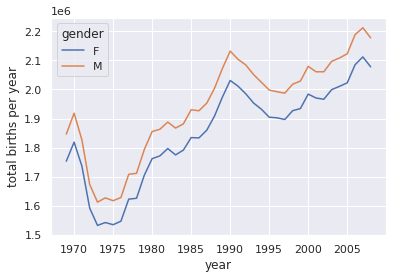

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# use Seaborn styles
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

In [5]:
# シグマクリップ
qualities = np.percentile(births['births'], [25, 50, 75, 99])
mu = qualities[1]
# サンプル平均のロバスト推定
# 四分位範囲(IQR=percentile(75%) - percentile(25%))は標準偏差=1の場合、IQR = 1.3489
# この値で割ることでNormalizedすると、NIQR = 1/1.3489 * IQR = 0.74 * IQR
sig = 0.74 * (qualities[2] - qualities[0])

In [6]:
qualities

array([  4358.  ,   4814.  ,   5289.5 , 173806.44])

In [7]:
sig

689.31

In [8]:
bq = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
bq['day'] = bq['day'].astype(int)
bq.index = pd.to_datetime(10000 * bq.year + 100 * bq.month + bq.day, format='%Y%m%d')
bq['dayofweek'] = bq.index.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'mean births by day')

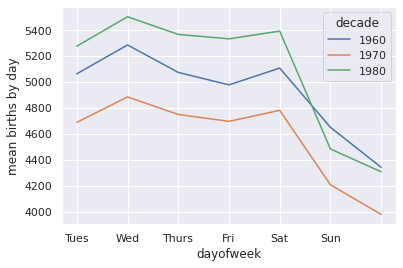

In [9]:
bq.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [10]:
# 年は考慮せず、月日のみで集約
# aggfuncは指定なしなので、defaultのmeanとなる
births_by_date = bq.pivot_table('births', [bq.index.month, bq.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [11]:
# ダミーの年を2012と設定
# 2/29を処理できるようにうるう年にする必要がある
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index] # pythonのリスト内包表記
births_by_date.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


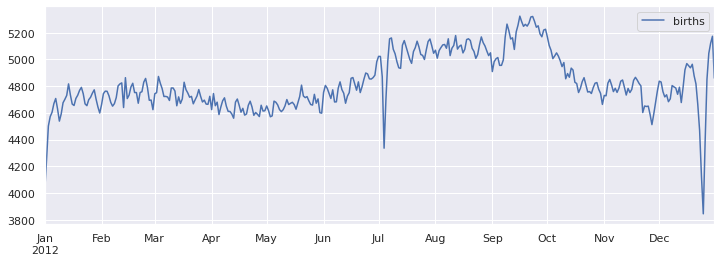

In [12]:
# 月日ごとの出生率の変化をグラフ化
# 大きく出生率が下がるのは国民の休日
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

In [13]:
import matplotlib as mpl

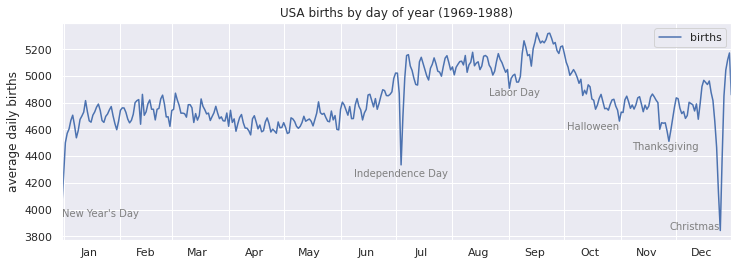

In [28]:
# 注釈をつける
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

(3600.0, 5400.0)

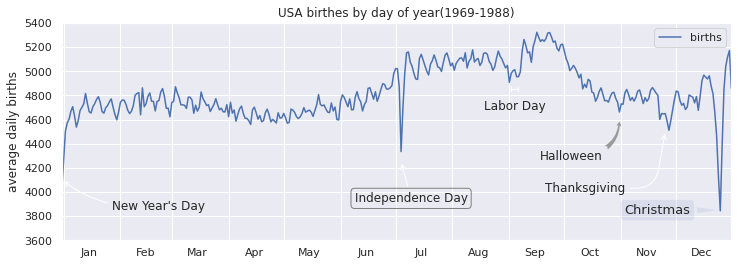

In [27]:
# 矢印と注釈
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day",
            xy=('2012-1-1', 4100),
            xycoords='data',
            xytext=(50, -30),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2")
)
ax.annotate("Independence Day",
            xy=('2012-7-4', 4250),
            xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40),
            textcoords='offset points',
            ha='center',
            arrowprops=dict(arrowstyle="->")
)
ax.annotate("Labor Day",
            xy=('2012-9-4', 4850),
            xycoords='data',
            xytext=(0, -20),
            textcoords='offset points',
            ha='center'
)
ax.annotate("",
            xy=('2012-9-1', 4850),
            xytext=('2012-9-7', 4850),
            xycoords='data',
            textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2',}
)
ax.annotate("Halloween",
            xy=('2012-10-31', 4600),
            xycoords='data',
            xytext=(-80, -40),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy", fc="0.6", ec="none", connectionstyle="angle3,angleA=0,angleB=-90")
)
ax.annotate("Thanksgiving",
            xy=('2012-11-25', 4500),
            xycoords='data',
            xytext=(-120, -60),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=20")
)
ax.annotate("Christmas",
            xy=('2012-12-25', 3850),
            xycoords='data',
            xytext=(-30, 0),
            textcoords='offset points',
            size=13,
            ha='right',
            va='center',
            bbox=dict(boxstyle="round", alpha=0.1),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1)
)

# Label the axes
ax.set(title='USA birthes by day of year(1969-1988)', ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
ax.set_ylim(3600, 5400)